# Librerias

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

## Estandarizacion de los datos
from sklearn.preprocessing import MinMaxScaler  ## Transforma los valores a [0,1]

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [175]:
ruta = "/content/drive/MyDrive/Colab Notebooks/cancer_classification.csv"

# **1. EDA**

In [176]:
df = pd.read_csv(ruta, sep=",")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: >

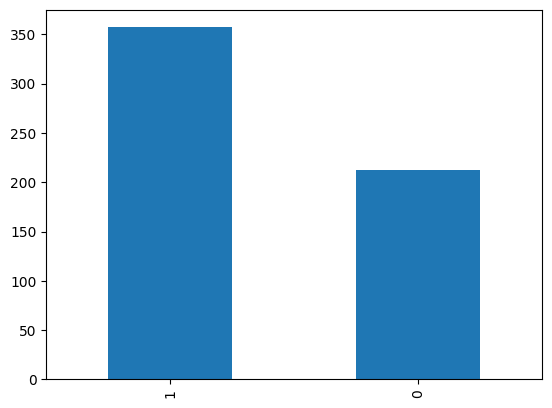

In [177]:
df.benign_0__mal_1.value_counts().plot.bar()

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

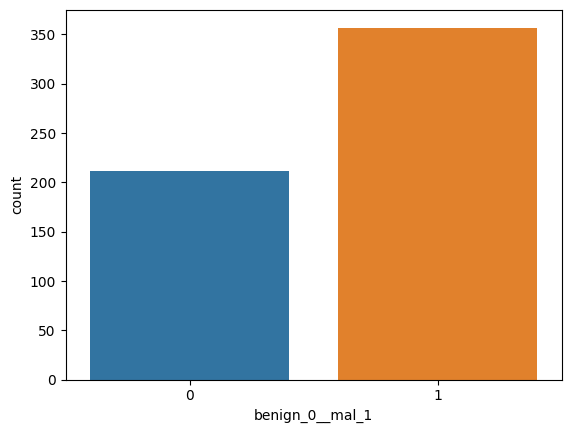

In [178]:
sns.countplot(df, x="benign_0__mal_1")

<Axes: >

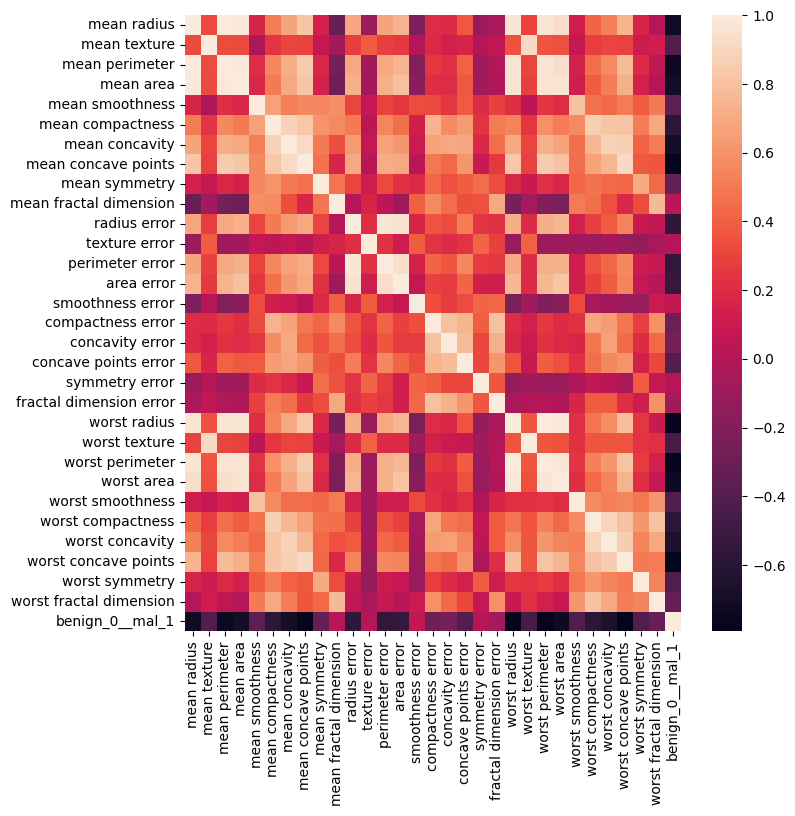

In [179]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

<Axes: >

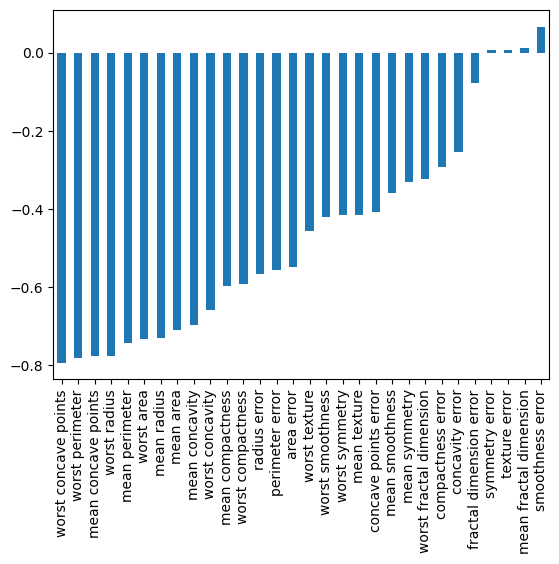

In [180]:
df.corr()["benign_0__mal_1"].sort_values()[:-1].plot.bar()

# **2. Entrenamiento del modelo**

In [181]:
X = df.drop("benign_0__mal_1", axis=1).values
y = df.benign_0__mal_1.values

In [182]:
X.shape, y.shape

((569, 30), (569,))

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [185]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [186]:
tf.random.set_seed(100)

In [187]:
## Arquitectura y compilacion
model = Sequential()
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

## Entrenamiento
model.fit(x=X_train_sc, y=y_train, epochs=400, validation_data=(X_test_sc, y_test), verbose=0)

In [188]:
hist = model.history.history
dfh = pd.DataFrame(hist)

<Axes: >

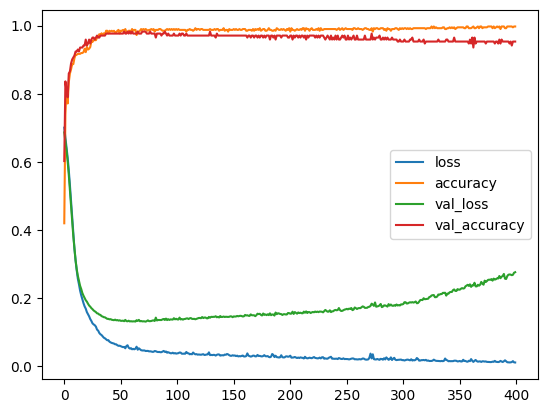

In [189]:
dfh.plot()

# **3. Early Stopping**

In [190]:
## Arquitectura y compilacion
model = Sequential()
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

early_stop = EarlyStopping(monitor= "val_loss", mode="min", patience=25, verbose=1)

## Entrenamiento
model.fit(x=X_train_sc,
          y=y_train,
          epochs=400,
          validation_data=(X_test_sc, y_test),
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
13/13 [==============================] - 1s 19ms/step - loss: 0.6920 - accuracy: 0.6281 - val_loss: 0.6706 - val_accuracy: 0.7427
Epoch 2/400
13/13 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.7965 - val_loss: 0.6380 - val_accuracy: 0.8538
Epoch 3/400
13/13 [==============================] - 0s 6ms/step - loss: 0.6203 - accuracy: 0.8392 - val_loss: 0.5979 - val_accuracy: 0.8713
Epoch 4/400
13/13 [==============================] - 0s 6ms/step - loss: 0.5746 - accuracy: 0.8342 - val_loss: 0.5488 - val_accuracy: 0.8655
Epoch 5/400
13/13 [==============================] - 0s 6ms/step - loss: 0.5248 - accuracy: 0.8869 - val_loss: 0.5007 - val_accuracy: 0.8772
Epoch 6/400
13/13 [==============================] - 0s 7ms/step - loss: 0.4744 - accuracy: 0.8794 - val_loss: 0.4537 - val_accuracy: 0.8889
Epoch 7/400
13/13 [==============================] - 0s 7ms/step - loss: 0.4262 - accuracy: 0.9121 - val_loss: 0.4089 - val_accuracy: 0.9181
Epoch 8/400


In [191]:
hist = model.history.history
dfh = pd.DataFrame(hist)

<Axes: >

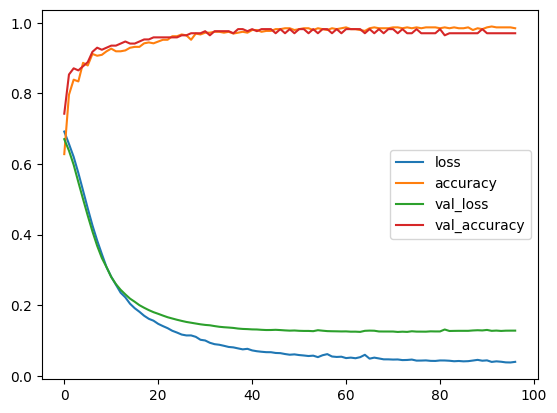

In [192]:
dfh.plot()

# **4. Dropout**

In [201]:
## Arquitectura y compilacion
model = Sequential()
model.add(Dense(units=30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

early_stop = EarlyStopping(monitor= "val_loss", mode="min", patience=25, verbose=1)

## Entrenamiento
model.fit(x=X_train_sc,
          y=y_train,
          epochs=400,
          validation_data=(X_test_sc, y_test),
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
13/13 [==============================] - 1s 19ms/step - loss: 0.7439 - accuracy: 0.4121 - val_loss: 0.6425 - val_accuracy: 0.7544
Epoch 2/400
13/13 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.5930 - val_loss: 0.6323 - val_accuracy: 0.8655
Epoch 3/400
13/13 [==============================] - 0s 6ms/step - loss: 0.6727 - accuracy: 0.5578 - val_loss: 0.6194 - val_accuracy: 0.8713
Epoch 4/400
13/13 [==============================] - 0s 6ms/step - loss: 0.6673 - accuracy: 0.6005 - val_loss: 0.6037 - val_accuracy: 0.9064
Epoch 5/400
13/13 [==============================] - 0s 6ms/step - loss: 0.6187 - accuracy: 0.6784 - val_loss: 0.5884 - val_accuracy: 0.8830
Epoch 6/400
13/13 [==============================] - 0s 6ms/step - loss: 0.5987 - accuracy: 0.7286 - val_loss: 0.5689 - val_accuracy: 0.8947
Epoch 7/400
13/13 [==============================] - 0s 8ms/step - loss: 0.5924 - accuracy: 0.7085 - val_loss: 0.5494 - val_accuracy: 0.9181
Epoch 8/400


In [202]:
hist = model.history.history
dfh = pd.DataFrame(hist)

<Axes: >

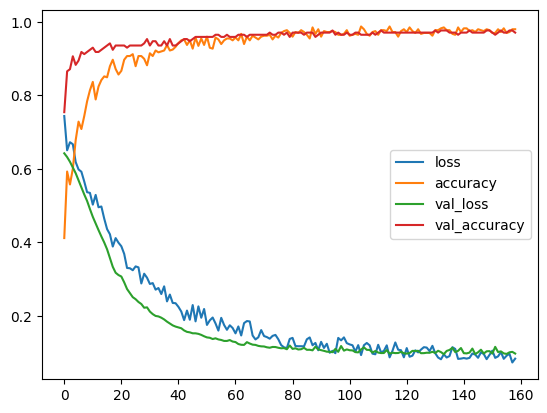

In [203]:
dfh.plot()